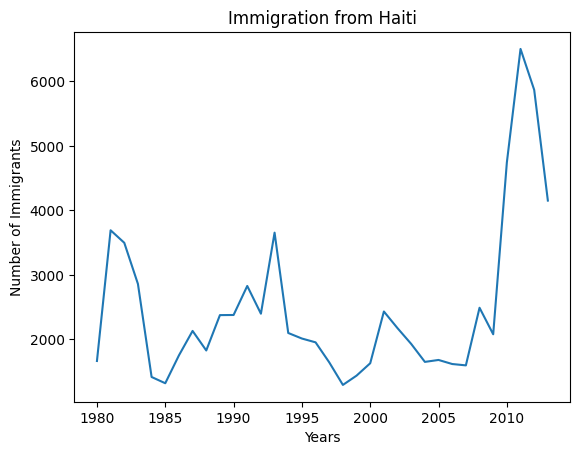

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

# Transforma o nome de todas as colunas em string
df_can.columns = df_can.columns.astype(str)
# Gera uma lista com os anos de 1980 a 2014
years = list(map(str, range(1980,2014)))
# Coloca a coluna 'OdName' como index
df_can = df_can.set_index('OdName')
# Gera o gráfico
df_can.loc['Haiti', years].plot(kind='line')

df_can = df_can.rename(columns={'AreaName':'Continent', 'RegName':'Region'},)
df_can = df_can.drop(["Type", "Coverage", "AREA", "DEV", "REG"], axis=1)

colunas = list(df_can)
colunas.remove('Continent')
colunas.remove('Region')
colunas.remove('DevName')
df_can['Total'] = df_can[colunas].sum(axis = 1)

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [3]:
df_continents = df_can.groupby('Continent', axis = 0).sum()
df_continents

/var/folders/_2/t8fy8ltx0gv9t0rdhzq7_5xr0000gn/T/ipykernel_5349/763501959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_can.groupby('Continent', axis = 0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


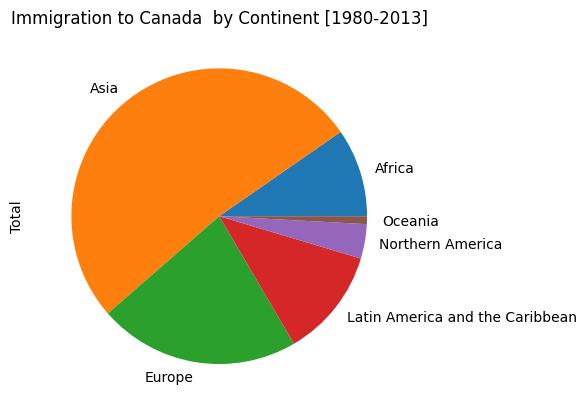

In [4]:
df_continents['Total'].plot(kind='pie')

plt.title('Immigration to Canada  by Continent [1980-2013]')
plt.show()


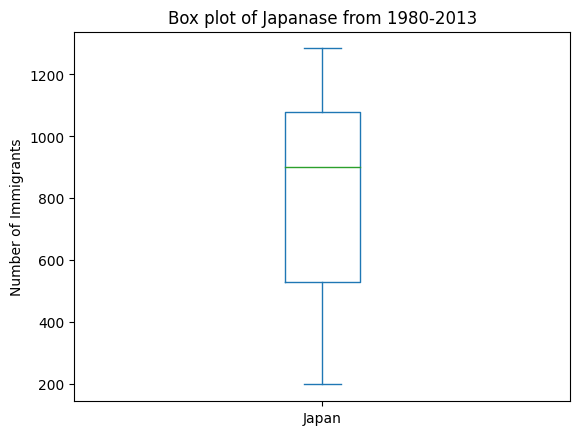

In [5]:
df_japan = df_can.loc[['Japan'], years].transpose()

df_japan.plot(kind='box')

plt.title('Box plot of Japanase from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()
